In [55]:
import hydra

import numpy as np
import pandas as pd
import plotnine as pn

from hydra.core.global_hydra import GlobalHydra

# Lets us import ibsg modules
import sys
sys.path.append("/Users/nathanielimel/uci/projects/ibsg/src")

from game.game import Game

In [56]:
all_data_fp = "../../analysis_data/all_data.csv"
df = pd.read_csv(all_data_fp)
df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,sender_delta,receiver_delta,min_epsilon,min_beta
0,1.526090e+00,1.270097,0.641931,2.278652,[0.0054146544510602634],0.012748,1.095495,0.0,simulation,NaN,...,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN,NaN,NaN
1,0.000000e+00,0.000000,1.912028,16.399997,NaN,NaN,NaN,1.0,trajectory,0.0,...,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN,NaN,NaN
2,0.000000e+00,0.000000,1.912028,16.330831,NaN,NaN,NaN,1.0,trajectory,1.0,...,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN,NaN,NaN
3,0.000000e+00,0.000000,1.912028,16.278492,NaN,NaN,NaN,1.0,trajectory,2.0,...,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN,NaN,NaN
4,8.881784e-16,0.000000,1.912028,16.236625,NaN,NaN,NaN,1.0,trajectory,3.0,...,1.0,0,replicator_diffusion,0.0,-8.0,6.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113754,6.641229e+00,NaN,NaN,0.000176,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113755,6.641591e+00,NaN,NaN,0.000150,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113756,6.641909e+00,NaN,NaN,0.000127,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113757,6.642187e+00,NaN,NaN,0.000107,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
def get_df_subsetted_by_meaning_dists(df: pd.DataFrame, curve_metadata) -> pd.DataFrame:
    """Return a subset of the data consistent with the specifications in the curve_metadata config."""

    # See src/get_all_data.py
    universe = df["universe"].astype(str) == str(curve_metadata.universe)
    prior = df["prior"].astype(str) == str(curve_metadata.prior)
    num_signals = df["num_signals"] == curve_metadata.num_signals # this is prob not necessary
    distance = df["distance"] == curve_metadata.distance

    meaning_dist_gamma = df["meaning_dist_gamma"] == curve_metadata.meaning_dist_gamma


    # imprecise_imitation_gamma = df["imprecise_imitation_gamma"].isin([curve_metadata.meaning_dist_gamma, np.nan]) # allows curve

    # df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_gamma & imprecise_imitation_gamma & bound_func]
    df_subsetted = df[universe & prior & num_signals & num_signals & distance & meaning_dist_gamma]

    return df_subsetted

In [58]:
overrides = [
    "game.universe=100",
    "game.num_signals=100",
    "game.meaning_dist_gamma=0",
    "simulation/dynamics=imprecise_conditional_imitation",
    # "simulation.dynamics.max_its=1000", # important to specify maxits
    "seed=0",
] # n.b.: do not include multirun overrides, we will filter from columns in the dataframe.

# Global initialization
GlobalHydra.instance().clear() # from previous runs of notebook
hydra.initialize(version_base=None, config_path="../../conf")
config = hydra.compose(
    config_name="config",
    overrides=overrides,
)

curve_metadata = config.game

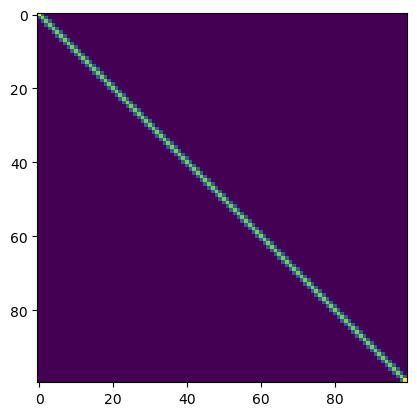

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

game = Game.from_hydra(config, cwd="/Users/nathanielimel/uci/projects/ibsg/data")
plt.imshow(game.meaning_dists)

In [60]:
# visualize the curve!
df = get_df_subsetted_by_meaning_dists(df, curve_metadata)
df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,sender_delta,receiver_delta,min_epsilon,min_beta
2020,4.447281,4.212743,0.898928,3.426674,[0.002361352745593681],0.002931,0.965165,0.0,simulation,NaN,...,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN,NaN,NaN
2021,5.901654,4.382777,0.728894,1587.433099,NaN,NaN,NaN,1.0,trajectory,0.0,...,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN,NaN,NaN
2022,4.061882,3.813843,1.297828,16.553020,NaN,NaN,NaN,1.0,trajectory,1.0,...,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN,NaN,NaN
2023,3.810319,3.629811,1.481861,9.329498,NaN,NaN,NaN,1.0,trajectory,2.0,...,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN,NaN,NaN
2024,3.774339,3.619316,1.492355,8.249201,NaN,NaN,NaN,1.0,trajectory,3.0,...,0.0,0,replicator_diffusion,0.0,2.0,42.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113754,6.641229,NaN,NaN,0.000176,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113755,6.641591,NaN,NaN,0.000150,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113756,6.641909,NaN,NaN,0.000127,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113757,6.642187,NaN,NaN,0.000107,NaN,NaN,NaN,NaN,mse_bound,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_final_points = df[df["point_type"] == "simulation"]
df_ib_bound = df[df["point_type"] == "ib_bound"]
df_mse_bound = df[df["point_type"] == "mse_bound"]

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


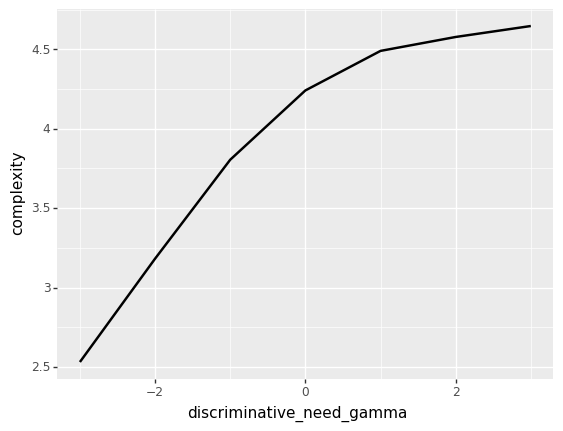

<ggplot: (402312688)>

In [62]:
(
    pn.ggplot(df_final_points, pn.aes(x="discriminative_need_gamma", y="complexity"))
    + pn.geom_smooth()
)

In [63]:
df_final_points["discriminative_need_gamma"] = 10 ** df_final_points["discriminative_need_gamma"]
df_final_points["imprecise_imitation_gamma"] = 10 ** df_final_points["imprecise_imitation_gamma"]

In [64]:
# restrict dynamics
df_final_points = df_final_points[df_final_points["dynamics"] == "imprecise_conditional_imitation"]

# Only run this if you're visualizing by discr need and fixing ii to -1
# df_final_points = df_final_points[df_final_points["imprecise_imitation_gamma"] == 10 ** -1]

df_final_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,sender_delta,receiver_delta,min_epsilon,min_beta
11918,4.462724,4.224359,0.887312,3.390360,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,6.0,0.068204,0.169810,0.000622,1.404098
12111,4.463129,4.224635,0.887036,3.389297,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,1.0,0.165923,0.170643,0.000634,1.404098
12304,4.464226,4.225424,0.886247,3.386742,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,8.0,0.222186,0.176205,0.000626,1.404098
12497,4.459818,4.222074,0.889597,3.397257,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,9.0,0.157543,0.159433,0.000837,1.404098
12690,4.451783,4.215876,0.895795,3.421653,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,0.0,0.148401,0.189733,0.001300,1.400058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106937,3.219534,3.174411,1.937261,14.752377,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,7.0,0.036944,0.020490,0.000049,1.067895
107130,3.221686,3.176428,1.935244,14.729704,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,2.0,0.034765,0.020060,0.000044,1.070976
107323,3.220864,3.175659,1.936013,14.738144,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,5.0,0.038923,0.024489,0.000046,1.070976
107516,3.219961,3.174807,1.936864,14.748722,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,4.0,0.043234,0.026848,0.000053,1.067895


In [65]:
df_final_points.discriminative_need_gamma.unique()

array([1.e+00, 1.e+01, 1.e-01, 1.e-03, 1.e+03, 1.e+02, 1.e-02])

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 208 rows containing missing values.


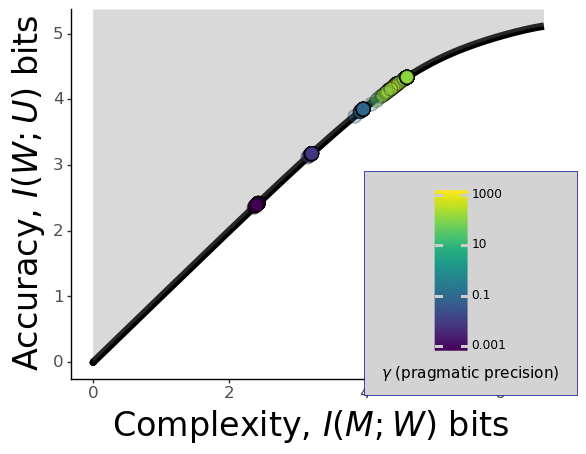

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: evolang_figure
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 208 rows containing missing values.


In [66]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=3) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # emergent langs
        data=df_final_points,
        mapping=pn.aes(
            fill="discriminative_need_gamma",
            # fill="imprecise_imitation_gamma",
            ),
        alpha=0.3,
        size=5,
    )
    + pn.labs(fill="$\\gamma$ (pragmatic precision)")
    # + pn.labs(fill="$\\alpha$ (perceptual certainty)")    
    + pn.scale_fill_continuous(
        trans = "log10",
    )
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.75, 0.31),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    ) 
)
print(plot)
plot.save("evolang_figure", width=6, height=6, dpi=300,)

In [67]:
# restrict to one specific gamma at a time
gammas = [
    0.001,
    0.01,
    0.1,
    1.0,
    10.0,
    100.0,
    1000.0,
]
df_final_points = df_final_points[df_final_points["discriminative_need_gamma"].isin(gammas)]

In [68]:
# df_final_points = df_final_points[df_final_points["population_init_gamma"] == -3]
df_final_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,sender_delta,receiver_delta,min_epsilon,min_beta
11918,4.462724,4.224359,0.887312,3.390360,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,6.0,0.068204,0.169810,0.000622,1.404098
12111,4.463129,4.224635,0.887036,3.389297,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,1.0,0.165923,0.170643,0.000634,1.404098
12304,4.464226,4.225424,0.886247,3.386742,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,8.0,0.222186,0.176205,0.000626,1.404098
12497,4.459818,4.222074,0.889597,3.397257,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,9.0,0.157543,0.159433,0.000837,1.404098
12690,4.451783,4.215876,0.895795,3.421653,NaN,NaN,NaN,0.0,simulation,NaN,...,1.00,0,imprecise_conditional_imitation,1.0,2.0,0.0,0.148401,0.189733,0.001300,1.400058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106937,3.219534,3.174411,1.937261,14.752377,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,7.0,0.036944,0.020490,0.000049,1.067895
107130,3.221686,3.176428,1.935244,14.729704,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,2.0,0.034765,0.020060,0.000044,1.070976
107323,3.220864,3.175659,1.936013,14.738144,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,5.0,0.038923,0.024489,0.000046,1.070976
107516,3.219961,3.174807,1.936864,14.748722,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,4.0,0.043234,0.026848,0.000053,1.067895


In [69]:
df_final_points["discriminative_need_gamma"] = df_final_points["discriminative_need_gamma"].astype(str)

In [70]:
# this is a dirty and beautiful hack from
# https://waldyrious.net/viridis-palette-generator/
fill_values_dict = {
    str(k): v for k, v in {
        "0.001": "#440154",
        "0.01": "#443983",
        "0.1": "#31688e",
        "1.0": "#21918c",
        "10.0": "#35b779",
        "100.0" : "#90d743",
        "1000.0": "#fde725", 
    }.items() }


In [71]:
# Make sure complexity max is np.log2(100)
df_ib_bound.complexity.max()

6.642037544472525

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 208 rows containing missing values.


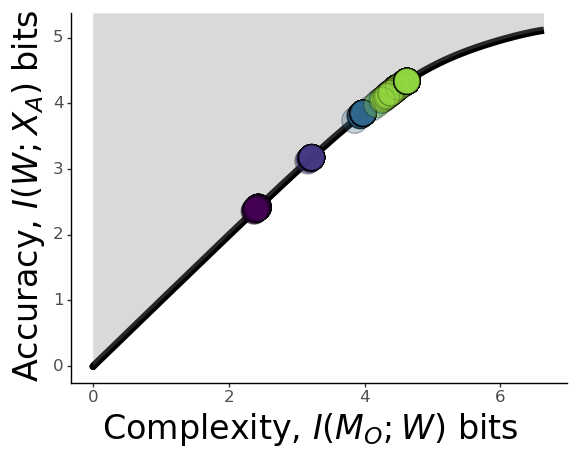

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: slide_figure
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 208 rows containing missing values.


In [72]:
# for slides

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )  
    + pn.geom_line(size=3) # IB curve
    # + pn.geom_point(size=1)
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
)

if True:
    plot = (
        plot 
        + pn.geom_jitter( # emergent langs
            data=df_final_points,
            mapping=pn.aes(
                # fill="discr_need",
                fill="discriminative_need_gamma",
                # shape="language",
                ),
            alpha=0.3,
            size=10,
            # fill="orange",
        )
        + pn.labs(fill="$\\gamma$ (pragmatic precision)")
        # + pn.scale_fill_continuous(
        #     trans = "log10",
        # )
        + pn.scale_fill_manual(values = fill_values_dict) 
    )
    
plot = (
    plot
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M_O;W)$ bits")
    + pn.ylab("Accuracy, $I(W;X_A)$ bits")
    # + pn.ylab("Informativeness, $I(W;U)$ bits")


    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.4),
        legend_position='none',
    )    
)

print(plot)
plot.save("slide_figure", width=10, height=10, dpi=300,)

# df_final_points["discriminative_need_gamma"] = df_final_points["discriminative_need_gamma"].astype(float)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1029 rows containing missing values.


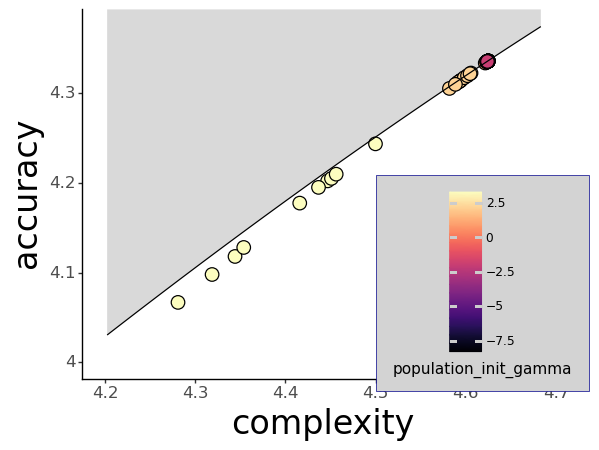

<ggplot: (402334429)>

In [73]:
# Zoom in on population initialization


(
    pn.ggplot(
        df_final_points[df_final_points["discriminative_need_gamma"] == '1000.0'],
        pn.aes(
            x="complexity",
            y="accuracy",            
        )
    )
    + pn.geom_ribbon(
        data=df_ib_bound,
        mapping=pn.aes(
            x="complexity",
            ymin="accuracy",
            ymax=np.inf,
            ),
            fill="gray",
            alpha=0.3,
    )    
    + pn.geom_point(
        pn.aes(
            fill="population_init_gamma",
        ),
        size=5,
    )
    + pn.scale_fill_continuous("magma")
    + pn.geom_line(
        data=df_ib_bound,
    )
    + pn.ylim(4,4.375)
    + pn.xlim(4.2,4.7)
    + pn.theme_classic()

    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.75, 0.31),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    ) 

)

### Distribution of efficiency loss

In [74]:
df_final_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,discriminative_need_gamma,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,sender_delta,receiver_delta,min_epsilon,min_beta
11918,4.462724,4.224359,0.887312,3.390360,NaN,NaN,NaN,0.0,simulation,NaN,...,1.0,0,imprecise_conditional_imitation,1.0,2.0,6.0,0.068204,0.169810,0.000622,1.404098
12111,4.463129,4.224635,0.887036,3.389297,NaN,NaN,NaN,0.0,simulation,NaN,...,1.0,0,imprecise_conditional_imitation,1.0,2.0,1.0,0.165923,0.170643,0.000634,1.404098
12304,4.464226,4.225424,0.886247,3.386742,NaN,NaN,NaN,0.0,simulation,NaN,...,1.0,0,imprecise_conditional_imitation,1.0,2.0,8.0,0.222186,0.176205,0.000626,1.404098
12497,4.459818,4.222074,0.889597,3.397257,NaN,NaN,NaN,0.0,simulation,NaN,...,1.0,0,imprecise_conditional_imitation,1.0,2.0,9.0,0.157543,0.159433,0.000837,1.404098
12690,4.451783,4.215876,0.895795,3.421653,NaN,NaN,NaN,0.0,simulation,NaN,...,1.0,0,imprecise_conditional_imitation,1.0,2.0,0.0,0.148401,0.189733,0.001300,1.400058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106937,3.219534,3.174411,1.937261,14.752377,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,7.0,0.036944,0.020490,0.000049,1.067895
107130,3.221686,3.176428,1.935244,14.729704,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,2.0,0.034765,0.020060,0.000044,1.070976
107323,3.220864,3.175659,1.936013,14.738144,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,5.0,0.038923,0.024489,0.000046,1.070976
107516,3.219961,3.174807,1.936864,14.748722,NaN,NaN,NaN,0.0,simulation,NaN,...,0.01,0,imprecise_conditional_imitation,1.0,-2.0,4.0,0.043234,0.026848,0.000053,1.067895


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_density : Removed 7 rows containing non-finite values.


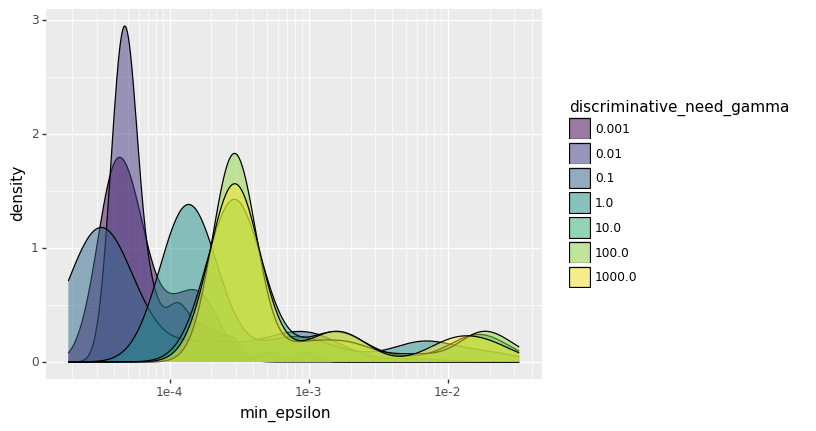

<ggplot: (402336228)>

In [119]:
# Get a basic histogram/density plot of the distribution of languages over efficiency loss
# TODO: color with vidiris
(
    pn.ggplot(
        data=df_final_points,
        mapping=pn.aes(
            x="min_epsilon",
        ),
    )
    + pn.geom_density(
        pn.aes(
            fill="discriminative_need_gamma",
        ),
        alpha=0.5,
    )
    # + pn.facet_grid("population_init_gamma ~ .")
    + pn.scale_fill_manual(values = fill_values_dict)
    + pn.scale_x_log10()
)

In [76]:
df_traj_points = df[df["point_type"] == "trajectory"]

df_traj_points["iteration"] = df_traj_points["round"]

# restrict dynamics
# df_traj_points = df_traj_points[df_traj_points["dynamics"] == "replicator_diffusion"]
df_traj_points = df_traj_points[df_traj_points["dynamics"] == "imprecise_conditional_imitation"]

# restrict the initialization and gamma
new_df = df_traj_points.loc[(df_traj_points['population_init_gamma'] == -3) & (df_traj_points["discriminative_need_gamma"] == 3) & (df_traj_points["imprecise_imitation_gamma"] == 0)] # was -1


# optionally filter points
# new_df = new_df[new_df["iteration"] == new_df["iteration"].max()]


In [77]:
df_fudge = pd.DataFrame(
    {
        "complexity": 0.,
        "accuracy": 0.,
        "point_type": "trajectory",
        "round": 0.,
        "discriminative_need_gamma": -3.0,
        "population_init_gamma": 3.0,
        "iteration": 0.,
    },
    index=[0]
)
df_fudge
# new_df = pd.concat([df_fudge, new_df])

new_df

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,sender_delta,receiver_delta,min_epsilon,min_beta,iteration
76619,6.932184e-07,2.786190e-07,5.111671,1666.375925,NaN,NaN,NaN,1.0,trajectory,1.0,...,0,imprecise_conditional_imitation,0.0,-3.0,6.0,0.068644,0.420931,4.190081e-07,0.993682,1.0
76620,3.988271e-07,3.247110e-07,5.111671,1666.207059,NaN,NaN,NaN,1.0,trajectory,2.0,...,0,imprecise_conditional_imitation,0.0,-3.0,6.0,0.044391,0.165065,7.665298e-08,0.993682,2.0
76621,1.122115e-06,1.001210e-06,5.111670,1666.084614,NaN,NaN,NaN,1.0,trajectory,3.0,...,0,imprecise_conditional_imitation,0.0,-3.0,6.0,0.082235,0.154885,1.280403e-07,0.993682,3.0
76622,3.645948e-06,3.367562e-06,5.111668,1665.984633,NaN,NaN,NaN,1.0,trajectory,4.0,...,0,imprecise_conditional_imitation,0.0,-3.0,6.0,0.155735,0.195384,3.015695e-07,0.993682,4.0
76623,1.256757e-05,1.182275e-05,5.111660,1665.897870,NaN,NaN,NaN,1.0,trajectory,5.0,...,0,imprecise_conditional_imitation,0.0,-3.0,6.0,0.297469,0.313735,8.247312e-07,0.993682,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78542,4.624240e+00,4.335750e+00,0.775921,2.914631,NaN,NaN,NaN,1.0,trajectory,195.0,...,0,imprecise_conditional_imitation,0.0,-3.0,3.0,0.057392,0.034187,2.979179e-04,1.508963,195.0
78543,4.624252e+00,4.335759e+00,0.775912,2.914600,NaN,NaN,NaN,1.0,trajectory,197.0,...,0,imprecise_conditional_imitation,0.0,-3.0,3.0,0.056566,0.033674,2.973614e-04,1.508963,197.0
78544,4.624258e+00,4.335763e+00,0.775908,2.914585,NaN,NaN,NaN,1.0,trajectory,198.0,...,0,imprecise_conditional_imitation,0.0,-3.0,3.0,0.056161,0.033423,2.970874e-04,1.508963,198.0
78545,4.624264e+00,4.335768e+00,0.775904,2.914571,NaN,NaN,NaN,1.0,trajectory,199.0,...,0,imprecise_conditional_imitation,0.0,-3.0,3.0,0.055761,0.033176,2.968162e-04,1.508963,199.0


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 208 rows containing missing values.


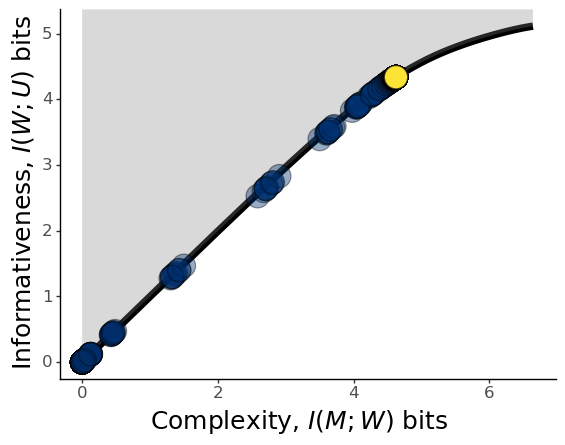

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: temp_slide_traj
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 208 rows containing missing values.


In [78]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )
    # + pn.geom_point(size=1)
    + pn.geom_line(size=3) # IB curve    
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=9,
    )
    # + pn.labs(fill="iteration")
    # + pn.scale_fill_continuous("cividis")
    + pn.scale_fill_continuous(
        "cividis",
        breaks=[0, 50, 100, 150, 200],
        limits=[0, 200],
    )
    + pn.labs(fill="Evolution\n\nstep\n")
    + pn.xlim([0,np.log2(100)])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    # + pn.ylab("Accuracy, $I(W;U)$ bits")
    + pn.ylab("Informativeness, $I(W;U)$ bits")
    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.45),
        legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, 
            linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom",
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = -2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)
plot.save("temp_slide_traj", width=6, height=6, dpi=300,)

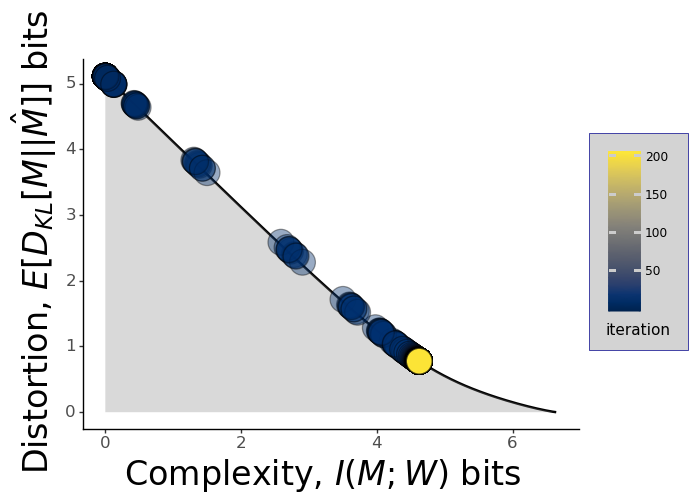

In [79]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="distortion")
    )  
    # + pn.geom_point(size=1)
    + pn.geom_line(size=1) # IB curve    
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin=0,
        ymax="distortion",
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=10,
    )
    + pn.scale_fill_continuous("cividis")
    # + pn.labs(fill="iteration")
    # + pn.scale_fill_continuous(
    #     type="magma",
    #     breaks=[0, 50, 100, 150, 200],
    #     limits=[0, 200],
    # )
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Distortion, $E[D_{KL}[M || \hat{M}]]$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.325),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)

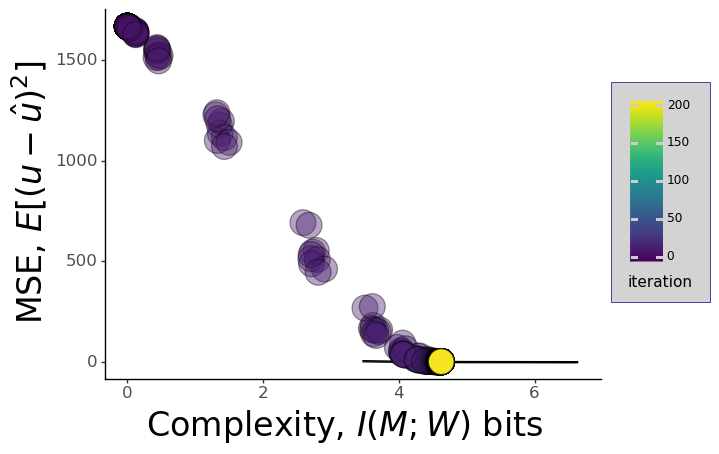

In [80]:

plot = (
    # Set data and the axes
    pn.ggplot(
        data=df_mse_bound, mapping=pn.aes(x="complexity", y="mse")
    )  
    # + pn.geom_point(size=1)
    + pn.geom_line(size=1) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin=0,
        ymax="mse",
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_point( # trajectories
    # + pn.geom_line(
        data=new_df,
        mapping=pn.aes(
            fill="iteration",
            # color="imprecise_imitation_gamma"
            # color="population_init_gamma",
            ),
        alpha=0.4,
        size=10,
    )

    + pn.labs(fill="iteration")
    + pn.scale_fill_continuous(
        breaks=[0, 50, 100, 150, 200],
        limits=[0, 200],
    )
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("MSE, $E[(u - \hat{u})^2]$")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=24),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.325),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    # guide not working, maybe should just use R
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
)
print(plot)

## Analyze trajectories
Are distances from curve always monotonically decreasing with evolution step?

In [81]:
df_traj_points

,complexity,accuracy,distortion,mse,gNID,eps,beta,run,point_type,round,...,meaning_dist_gamma,dynamics,imprecise_imitation_gamma,population_init_gamma,seed,sender_delta,receiver_delta,min_epsilon,min_beta,iteration
11919,5.797873,4.285707,0.825964,1321.097913,NaN,NaN,NaN,1.0,trajectory,1.0,...,0,imprecise_conditional_imitation,0.0,2.0,6.0,171.281989,174.306457,0.856338,1.457685,1.0
11920,4.082140,3.832453,1.279218,16.844495,NaN,NaN,NaN,1.0,trajectory,2.0,...,0,imprecise_conditional_imitation,0.0,2.0,6.0,23.438325,51.998748,0.103933,1.198336,2.0
11921,4.005948,3.819018,1.292654,6.512237,NaN,NaN,NaN,1.0,trajectory,3.0,...,0,imprecise_conditional_imitation,0.0,2.0,6.0,10.365939,23.355385,0.053919,1.194888,3.0
11922,4.021359,3.848466,1.263205,5.630705,NaN,NaN,NaN,1.0,trajectory,4.0,...,0,imprecise_conditional_imitation,0.0,2.0,6.0,7.049040,15.509987,0.036951,1.205261,4.0
11923,4.046139,3.875658,1.236013,5.387353,NaN,NaN,NaN,1.0,trajectory,5.0,...,0,imprecise_conditional_imitation,0.0,2.0,6.0,5.977408,10.259664,0.030069,1.212226,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107896,3.219708,3.174568,1.937104,14.751218,NaN,NaN,NaN,1.0,trajectory,195.0,...,0,imprecise_conditional_imitation,0.0,-2.0,3.0,0.045177,0.026934,0.000055,1.067895,195.0
107897,3.219727,3.174586,1.937085,14.750967,NaN,NaN,NaN,1.0,trajectory,197.0,...,0,imprecise_conditional_imitation,0.0,-2.0,3.0,0.044562,0.026591,0.000054,1.067895,197.0
107898,3.219737,3.174595,1.937076,14.750844,NaN,NaN,NaN,1.0,trajectory,198.0,...,0,imprecise_conditional_imitation,0.0,-2.0,3.0,0.044262,0.026423,0.000054,1.067895,198.0
107899,3.219746,3.174604,1.937067,14.750723,NaN,NaN,NaN,1.0,trajectory,199.0,...,0,imprecise_conditional_imitation,0.0,-2.0,3.0,0.043965,0.026255,0.000054,1.067895,199.0


In [82]:
# Restrict to ii=-1
df_traj_analysis = df_traj_points[df_traj_points["imprecise_imitation_gamma"] == 0]

gamma = 'discriminative_need_gamma'

df_traj_analysis = df_traj_analysis[["iteration", "min_distance_to_curve", "min_epsilon", "min_beta", gamma, "population_init_gamma", "complexity", "accuracy"]]

# df_traj_analysis = df_traj_analysis[df_traj_analysis[gamma] == 0.] 

df_traj_analysis[gamma] = 10 ** df_traj_analysis[gamma]
df_traj_analysis["population_init_gamma"] = 10 ** df_traj_analysis["population_init_gamma"]

df_traj_analysis["discriminative_need_gamma"] = df_traj_analysis["discriminative_need_gamma"].astype(str)

df_traj_analysis

,iteration,min_distance_to_curve,min_epsilon,min_beta,discriminative_need_gamma,population_init_gamma,complexity,accuracy
11919,1.0,0.578194,0.856338,1.457685,1.0,100.00,5.797873,4.285707
11920,2.0,0.079510,0.103933,1.198336,1.0,100.00,4.082140,3.832453
11921,3.0,0.041355,0.053919,1.194888,1.0,100.00,4.005948,3.819018
11922,4.0,0.028523,0.036951,1.205261,1.0,100.00,4.021359,3.848466
11923,5.0,0.023512,0.030069,1.212226,1.0,100.00,4.046139,3.875658
...,...,...,...,...,...,...,...,...
107896,195.0,0.019291,0.000055,1.067895,0.01,0.01,3.219708,3.174568
107897,197.0,0.019318,0.000054,1.067895,0.01,0.01,3.219727,3.174586
107898,198.0,0.019332,0.000054,1.067895,0.01,0.01,3.219737,3.174595
107899,199.0,0.019345,0.000054,1.067895,0.01,0.01,3.219746,3.174604


In [83]:
# Ensure iteration max is the same as max_its specified by game config
df_traj_analysis.iteration.max()

200.0

In [84]:
# geom line not behaving like expected, so let's save and try in R
df_traj_analysis.to_csv("trajectory_analysis_data.csv", index=False)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


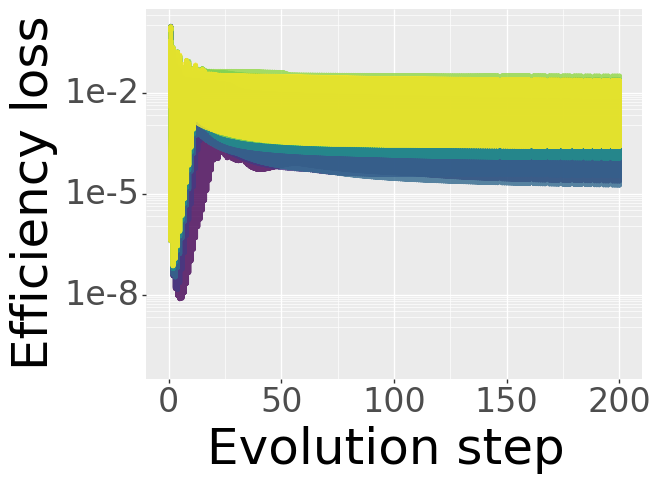

In [85]:
plot = (
    pn.ggplot(
        df_traj_analysis,
        pn.aes(
            x="iteration", 
            y="min_epsilon", 
        ),
    )
    + pn.geom_line(
        pn.aes(color="discriminative_need_gamma"),
        size=2,
        alpha=0.8,
        )
    # + pn.scale_color_continuous(
        # trans = "log10",
    # )
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    
    + pn.xlab("Evolution step")
    # + pn.ylab("Distance to curve")
    + pn.ylab("Efficiency loss")
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=36),
        axis_text=pn.element_text(size=24),
        # Legend position
        legend_position=(0.7, 0.6),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        color = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    )
    + pn.scale_y_continuous(
        trans='log10', 
        limits=[1e-10, 1.],
    )
    # + pn.ylim(0,.1)
)
print(plot)
# plot.save("distance_plot.png", width=6, height=6, dpi=300,)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 200 rows containing missing values.


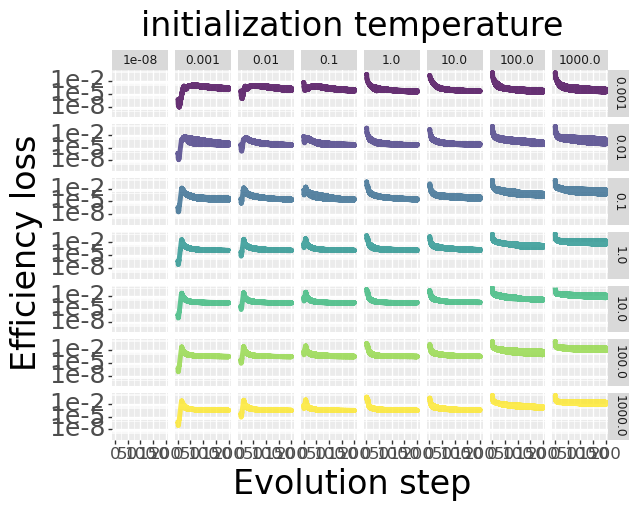

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 18 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: distances_plot.png
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 200 rows containing missing values.


In [86]:
plot = (
    plot 
    + pn.facet_grid("discriminative_need_gamma ~ population_init_gamma") 
    + pn.ggtitle("initialization temperature")
    + pn.theme(
        title=pn.element_text(size=24),
        axis_text_x=pn.element_text(size=12),
        axis_text_y=pn.element_text(size=18),
        legend_position='none',
    )

)

print(plot)
plot.save("distances_plot.png", width=18, height=6, dpi=300,)

Focus on one individual initialization

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


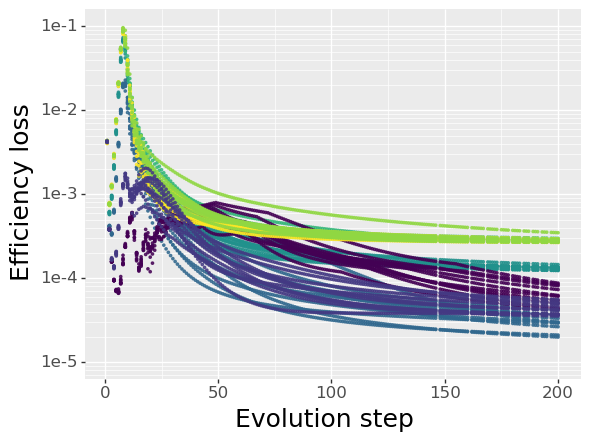

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: distance_plot.png
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


In [121]:
plot = (
    pn.ggplot(
        df_traj_analysis[df_traj_analysis["population_init_gamma"] == 1.],
        pn.aes(
            x="iteration", 
            y="min_epsilon", 
        ),
    )
    + pn.geom_point(
        pn.aes(color="discriminative_need_gamma"),
        size=0.5,
        alpha=0.8,
        )
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    
    + pn.xlab("Evolution step")
    + pn.ylab("Efficiency loss")
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.7, 0.6),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        color = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    )
    + pn.scale_y_continuous(
        trans='log10', 
        limits=[1e-5, 0.1],
    )
    # + pn.ylim(0,0.1)
    # + pn.xlim(0,50)
)
print(plot)
plot.save("distance_plot.png", width=6, height=6, dpi=300,)

In [88]:
(
    plot
    + pn.scale_y_continuous(
        trans='log10', 
        limits=[1e-4, 1.],
    )
    + pn.theme(
        axis_title=pn.element_blank(),
        # axis_text=pn.element_blank(),
    )
).save("distance_plot_zoomed.png", width=8, height=6, dpi=300,)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: distance_plot_zoomed.png
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 3778 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


### Efficiency loss over trajectories

In [89]:
df_traj_analysis.min_epsilon

11919     0.856338
11920     0.103933
11921     0.053919
11922     0.036951
11923     0.030069
            ...   
107896    0.000055
107897    0.000054
107898    0.000054
107899    0.000054
107900    0.000054
Name: min_epsilon, Length: 94990, dtype: float64

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/guides/guide_colorbar.py:72: PlotnineWarning: colorbar guide needs continuous scales


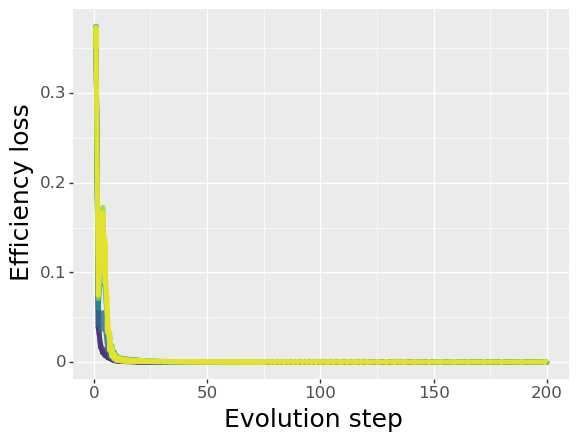

In [90]:
plot = (
    pn.ggplot(
        df_traj_analysis[df_traj_analysis["population_init_gamma"] == 1.],
        pn.aes(
            x="iteration", 
            y="min_epsilon", 
        ),
    )
    + pn.geom_line(
        pn.aes(color="discriminative_need_gamma"),
        size=2,
        alpha=0.8,
        )
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    
    + pn.xlab("Evolution step")
    + pn.ylab("Efficiency loss")
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        legend_position=(0.7, 0.6),
        # legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        color = pn.guide_colorbar(
            title_position = "bottom", 
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            ),
    )
)
print(plot)

In [91]:
from scipy.stats import spearmanr, kendalltau

# for each gamma, compute monotonicity for min_distances
result = df_traj_analysis.groupby(gamma).apply(lambda group: kendalltau(group['min_distance_to_curve'], group['iteration'])).reset_index()
result.columns=[gamma, "result"]

In [92]:
# Extract correlation coefficients and p-values into separate columns
result[['kendall_tau', 'p_value']] = result['result'].apply(pd.Series)
result = result.drop(columns=['result'])
result

,discriminative_need_gamma,kendall_tau,p_value
0,0.001,0.023010,6.076958e-05
1,0.01,0.131815,9.158528e-117
2,0.1,-0.177265,1.573814e-209
3,1.0,-0.192073,1.251200e-245
4,10.0,-0.286291,0.000000e+00
5,100.0,-0.277553,0.000000e+00
6,1000.0,-0.284540,0.000000e+00


/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


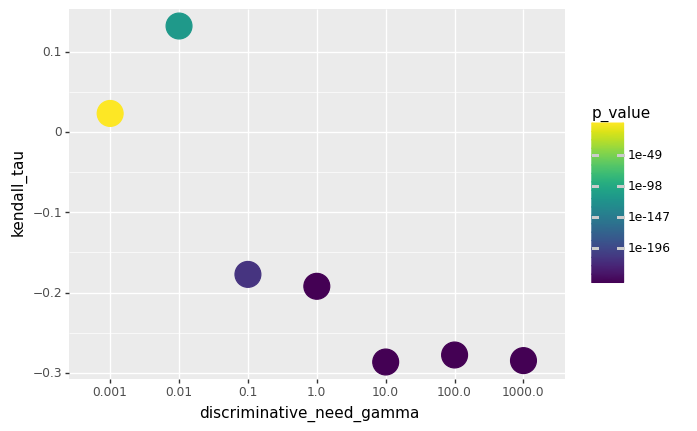

<ggplot: (393105853)>

In [93]:
(
    pn.ggplot(
        result,
        pn.aes(x=gamma, y="kendall_tau", color="p_value")
    )
    + pn.scale_color_continuous(
        trans = "log10",
    )
    + pn.geom_point(size=10)
)

Try to get some trajectories

In [94]:

df_traj_ = df_traj_analysis[df_traj_analysis["population_init_gamma"] == 1.]
df_final_ = df_final_points[df_final_points["population_init_gamma"] == 1.]

(
    # Set data and the axes
    pn.ggplot(
        data=df_ib_bound, mapping=pn.aes(x="complexity", y="accuracy")
    )
    # + pn.geom_point(size=1)
    + pn.geom_line(size=3) # IB curve
    + pn.geom_ribbon(
    mapping=pn.aes(
        x="complexity",
        ymin="accuracy",
        ymax=np.inf,
        ),
        fill="gray",
        alpha=0.3,
    )
    + pn.geom_line( # trajectories
    # + pn.geom_line(
        data=df_traj_,
        mapping=pn.aes(
            color=gamma,
            ),
        alpha=0.8,
        size=2,
    )
    + pn.geom_point( # Final points
    # + pn.geom_line(
        data=df_final_,
        mapping=pn.aes(
            color=gamma,
            ),
        # alpha=0.8,
        size=5,
        shape="X",
    )    
    + pn.scale_color_manual(values = fill_values_dict)
    + pn.labs(color="$\\gamma$ (pragmatic precision)")    

    # + pn.xlim([0,np.log2(100)])
    + pn.xlim([0., 3.2,])    
    + pn.ylim([0., 3.,])
    + pn.xlab("Complexity, $I(M;W)$ bits")
    + pn.ylab("Accuracy, $I(W;U)$ bits")

    + pn.theme_classic()
    + pn.theme(
        # Axis font
        axis_title=pn.element_text(size=18),
        axis_text=pn.element_text(size=12),
        # Legend position
        # legend_position=(0.75, 0.45),
        legend_position='none',
        legend_direction = "vertical",
        # Legend box
        legend_background=pn.element_rect(
            fill="lightgrey",
            size=0.5, linetype="solid", 
            color="darkblue",
        ),
    )
    + pn.guides(
        # fill = pn.guide_legend(
        fill = pn.guide_colorbar(
            title_position = "bottom", 
            # hjust = 0.5 centers the title horizontally
            title_hjust = 0.8,
            title_vjust = 2.,
            label_position = "bottom",
            override_aes = {"alpha":0.8},
            # nrow=3,
            ),
    ) 
).save("trajectory_plot_zoomed.png", width=8, height=6, dpi=300,)

/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: trajectory_plot_zoomed.png
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 485 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1870 rows containing missing values.
/Users/nathanielimel/miniforge3/envs/ibsg/lib/python3.10/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 60 rows containing missing values.


## TODO: 
- clean up and standardize all the plots you want, put them in a script. 
- also inspect random seed (doubt we'll be able to see a diff)
- or visualize the trajs / distances as curves with one line per intitialization temp, maybe bolding one of them, as if init temp was a random seed.
- we can start by writing a new notebook. But to be careful, copy and paste these instructions into a new file and then git revert the notebooks dir.